# 확률변수와 상관관계
### 1. 확률적 데이터와 확률변수

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
np.random.seed(0)
x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

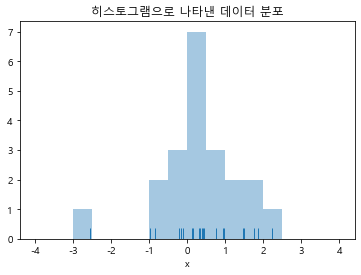

In [5]:
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

- 기술 통계

In [6]:
# 표본 평균, 표본 중앙값
np.mean(x), np.median(x)

(0.4206524782418389, 0.4001572083672233)

In [9]:
# 연속 데이터에 대한 최빈 구간
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print(f"최빈구간: {bins[m_bin]} ~ {bins[m_bin + 1]}")

최빈구간: 0.0 ~ 0.5


In [11]:
# 연습문제 7.1.1 
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

In [14]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


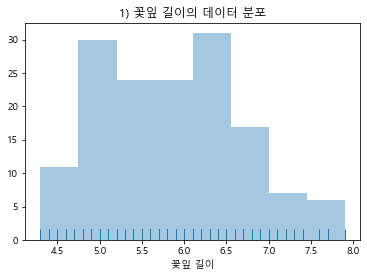

In [18]:
# 1) 꽃잎 길이
sns.distplot(df['sepal length (cm)'], rug=True, kde=False)
plt.title("1) 꽃잎 길이의 데이터 분포")
plt.xlabel("꽃잎 길이")
plt.show()

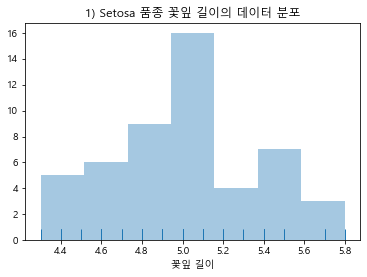

In [19]:
# 2) Setosa 품종의 꽃잎 길이
sns.distplot(df[df.species == 'setosa']['sepal length (cm)'], rug=True, kde=False)
plt.title("1) Setosa 품종 꽃잎 길이의 데이터 분포")
plt.xlabel("꽃잎 길이")
plt.show()

- 대칭 분포

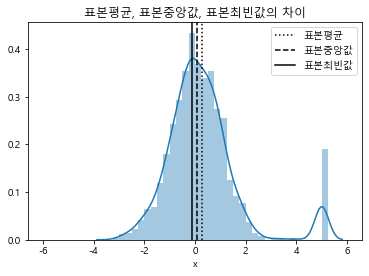

In [20]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

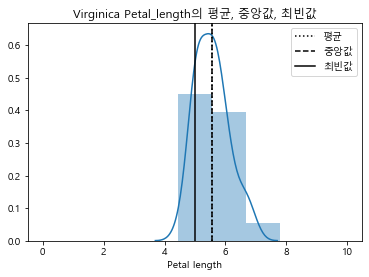

In [32]:
# 연습 문제 7.1.2 - 1)
vg = df[df.species == 'virginica']['petal length (cm)']
bins = np.linspace(0, 10, 10)
ns, _ = np.histogram(vg, bins=bins)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(vg, bins=bins)
plt.axvline(np.mean(vg), c='k', ls=":", label="평균")
plt.axvline(np.median(vg), c='k', ls="--", label="중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="최빈값")
plt.title("Virginica Petal_length의 평균, 중앙값, 최빈값")
plt.xlabel("Petal length")
plt.legend()
plt.show()

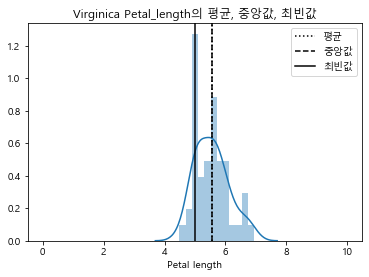

In [33]:
bins = np.linspace(0, 10, 50)
ns, _ = np.histogram(vg, bins=bins)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(vg, bins=bins)
plt.axvline(np.mean(vg), c='k', ls=":", label="평균")
plt.axvline(np.median(vg), c='k', ls="--", label="중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="최빈값")
plt.title("Virginica Petal_length의 평균, 중앙값, 최빈값")
plt.xlabel("Petal length")
plt.legend()
plt.show()

In [37]:
import scipy as sp 
sp.random.seed(0)

In [38]:
x = sp.stats.norm(0,2).rvs(1000)    # 평균=0, 표준편차=2 인 정규분포 데이터 생성
np.var(x), np.std(x)

(3.896937825248617, 1.9740663173380515)

In [39]:
# 비편향 표본분산, 표본표준편차
np.var(x, ddof=True), np.std(x, ddof=True)

(3.900838663912529, 1.9750540913890255)

In [41]:
print(x[:10])

[ 3.52810469  0.80031442  1.95747597  4.4817864   3.73511598 -1.95455576
  1.90017684 -0.30271442 -0.2064377   0.821197  ]


In [43]:
# 연습 문제 7.1.3
import pandas_datareader.data as web
df = web.DataReader("DJCA", data_source='fred').dropna()["DJCA"]
df.head()

DATE
2017-02-10    7093.67
2017-02-13    7142.40
2017-02-14    7146.31
2017-02-15    7186.12
2017-02-16    7181.24
Name: DJCA, dtype: float64

In [45]:
df.shift(1).head()

DATE
2017-02-10        NaN
2017-02-13    7093.67
2017-02-14    7142.40
2017-02-15    7146.31
2017-02-16    7186.12
Name: DJCA, dtype: float64

In [44]:
r = np.log(df / df.shift(1)).dropna().values
r[:5]

array([ 0.00684602,  0.00054729,  0.00555525, -0.00067932,  0.00103132])

In [46]:
# 1) 다우지수 일간수익률의 표본평균, 표본분산, 표본표준편차
np.mean(r), np.var(r), np.std(r)

(0.0004048346878847953, 0.0001556636224271516, 0.012476522850023222)

In [48]:
# 2) 연간변동성(annual volatility)
np.std(r) * np.sqrt(256) * 100

19.962436560037155

- 표본 비대칭도, 표본 첨도

In [50]:
sp.stats.skew(x), sp.stats.kurtosis(x)

(0.03385895323565712, -0.0467663244783294)

In [51]:
# 표본 모멘트
sp.stats.moment(x, 1), sp.stats.moment(x, 2), sp.stats.moment(x, 3), sp.stats.moment(x, 4)

(0.0, 3.896937825248617, 0.2604706193725514, 44.84817401965371)

### 2. 기댓값과 확률변수의 변환

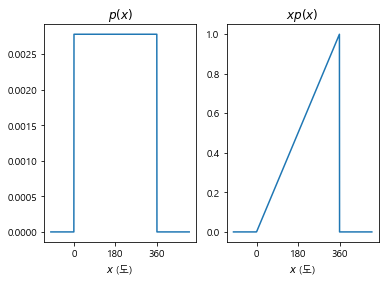

In [54]:
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 360)] = 1 / 360
xp = x * p

plt.subplot(121)
plt.plot(x, p)
plt.xticks([0, 180, 360])
plt.title("$p(x)$")
plt.xlabel("$x$ (도)")

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title("$xp(x)$")
plt.xlabel("$x$ (도)")

plt.show()

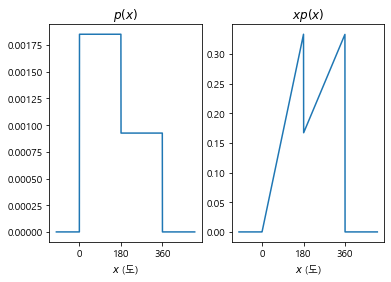

In [55]:
# 0도에서 180도 사이에 화살이 2배 더 잘 박히도록 원반이 조작
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 180)] = 2 / (3 * 360)
p[(180 < x) & (x <= 360)] = 1 / (3 * 360)
xp = x * p

plt.subplot(121)
plt.plot(x, p)
plt.xticks([0, 180, 360])
plt.title("$p(x)$")
plt.xlabel("$x$ (도)")

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title("$xp(x)$")
plt.xlabel("$x$ (도)")\

plt.show()

In [61]:
# 연습 문제 7.2.3
x = np.arange(1,361)
p = np.zeros(360)
p[(0 < x) & (x <= 180)] = 2 / (3 * 360)
p[(180 < x) & (x <= 360)] = 1 / (3 * 360)
np.sum(x * p) / 360

0.20902777777777778